In [1]:
import pandas as pd
import seaborn as sns
from refuelplot import *
setup()
sns.set_style("darkgrid")

from paths import results_path

In [2]:
results = pd.read_pickle(results_path + '/results_merged.pkl')

In [3]:
results['systemsize2'] = pd.cut(results.systemsize,
                                pd.IntervalIndex.from_tuples([(0,0.1),(0.1,0.2), (0.2,0.3), (0.3,0.4), (0.4,0.5), (0.5,1)]))

# 1. MERRA vs. ERA

very clear: in both, USA and Brazil:
- correlations are higher with ERA5
- RMSE and MBE are lower with ERA5

**-> ERA5 is better than MERRA2**

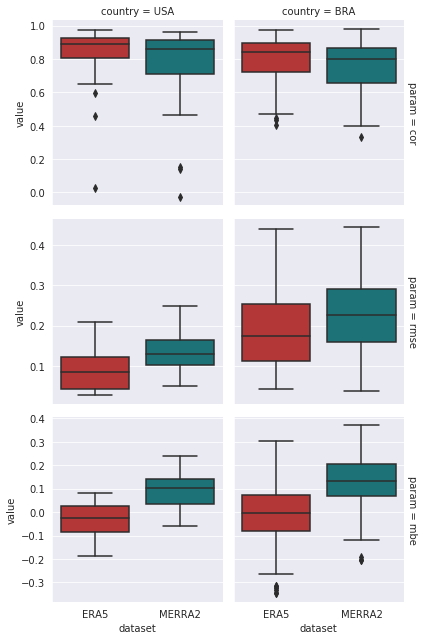

In [5]:
res = results[(results.param!='avg')&(results.GWA=='none')]
sns.catplot(x = 'dataset', y = 'value', col='country',row='param',
              kind='box',#hue='dataset',
            height=3, aspect=1,
            data=res, margin_titles=True, sharey='row'
           )#.set_axis_labels("dataset", "parameter")#.set_xticklabels(rotation=20)

# 2. GWA2 vs GWA3

Correlation
- impact negligible

RMSE:
- in BRA hardly any impact
- in USA slightly better with GWA2, but worse with GWA3

MBE:
- in BRA GWA increases error, GWA2 shift down, GWA3 shift up
- in USA overestimation instead of underestimation, GWA3 increases error, GWA2 shifts it
- without GWA error aroud 0

**-> GWA not recommended with ERA5 (especially not GWA3)**

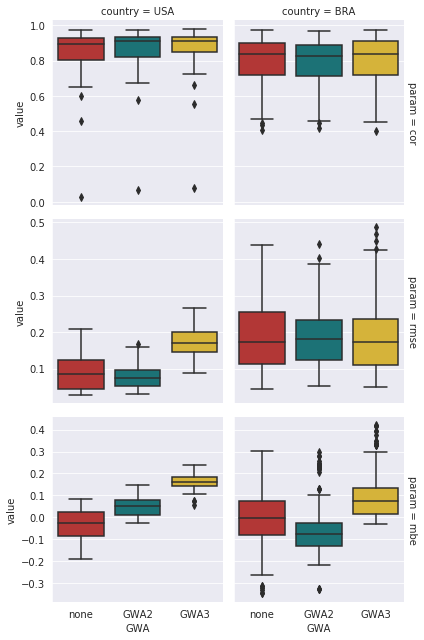

In [6]:
res = results[(results.param!='avg')&(results.dataset=='ERA5')]
sns.catplot(x = 'GWA', y = 'value', col='country',row='param',
              kind='box',#hue='dataset',
            height=3, aspect=1,
            data=res, margin_titles=True, sharey='row')#.set_axis_labels("dataset", "parameter")#.set_xticklabels(rotation=20)

### 2.1 impact of GWA on MERRA2

Correlation
- impact negligible (but slightly decreased)

RMSE:
- in BRA decreased by GWA3
- in USA better with GWA2, but worse with GWA3

MBE:
- in BRA shift to underestimation instead of overestimation with GWA2, GWA3 decreases error
- in USA better with GWA2, GWA3 increases error

**-> GWA2 helps in USA, GWA3 in BRA with MERRA2**

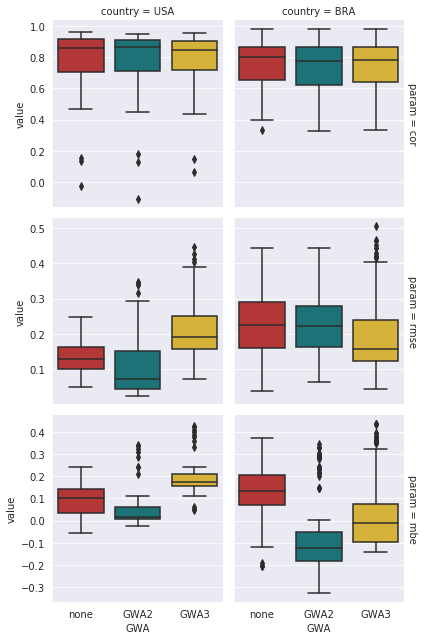

In [7]:
res = results[(results.param!='avg')&(results.dataset=='MERRA2')]
sns.catplot(x = 'GWA', y = 'value', col='country',row='param',
              kind='box', margin_titles=True, sharey='row',
            height=3, aspect=1,
            data=res)

# 3. spatial resolution

In USA slight tendency of higher correlations and lower error at larger system size

In Brazil similar, except for second largest group (0.1, 0.2], which seems to perform quite badly (BA and RS)

In [ ]:
res = results[(results.dataset=='ERA5')&(results.GWA=='none')&(results.param!='avg')]
sns.catplot(x = 'systemsize2', y = 'value', col='country',row='param',
              kind='box',#hue='dataset',
            height=3, aspect=1.5,
            data=res, margin_titles=True, sharey='row').set_axis_labels("systemsize", "value")#.set_xticklabels(rotation=20)

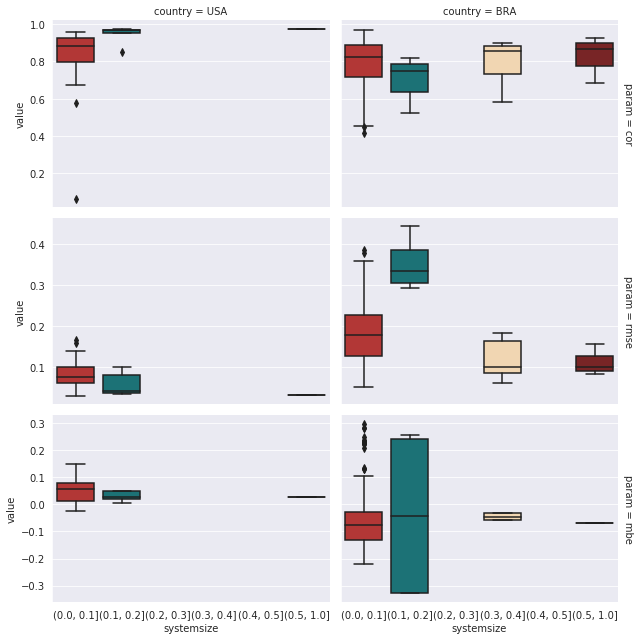

In [24]:
res = results[(results.dataset=='ERA5')&(results.GWA=='GWA2')&(results.param!='avg')]
sns.catplot(x = 'systemsize2', y = 'value', col='country',row='param',
              kind='box',#hue='dataset',
            height=3, aspect=1.5,
            data=res, margin_titles=True, sharey='row').set_axis_labels("systemsize", "value")#.set_xticklabels(rotation=20)

#### split by temporal resolution

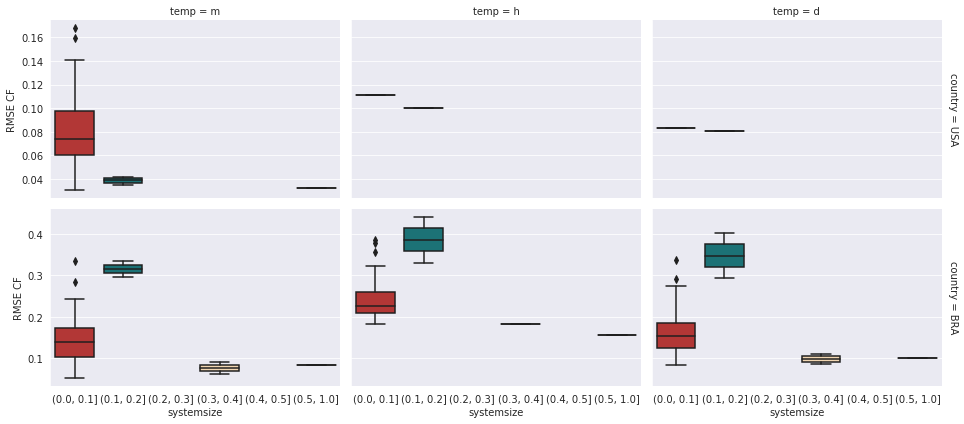

In [20]:
res = results[(results.dataset=='ERA5')&(results.GWA=='GWA2')&(results.param=='rmse')]
sns.catplot(x = 'systemsize2', y = 'value', col='temp',row='country',
              kind='box',#hue='dataset',
            height=3, aspect=1.5,
            data=res, margin_titles=True, sharey='row').set_axis_labels("systemsize", "RMSE CF")#.set_xticklabels(rotation=20)

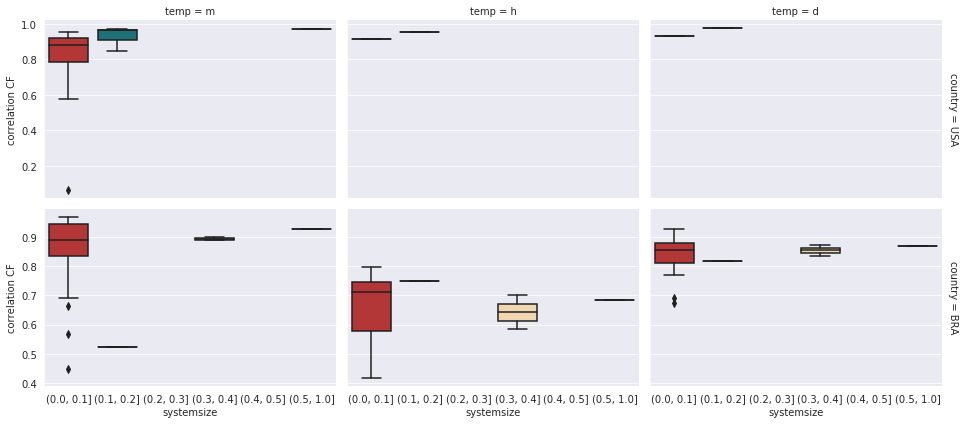

In [22]:
res = results[(results.dataset=='ERA5')&(results.GWA=='GWA2')&(results.param=='cor')]
sns.catplot(x = 'systemsize2', y = 'value', col='temp',row='country',
              kind='box',#hue='dataset',
            height=3, aspect=1.5,
            data=res, margin_titles=True, sharey='row').set_axis_labels("systemsize", "correlation CF")#.set_xticklabels(rotation=20)

# 4. temporal resolution

only use TX and BPA in USA

clear tendency: correlations are reduced and RMSEs increased when increasing the temporal resolution

MBE less obvious in USA and in BRA hardly any change

In [ ]:
res = results[(results.dataset=='ERA5')&(results.GWA=='none')&(results.param!='avg')&((results.region=='BPA')|(results.region=='TX')|(results.country=='BRA'))]
sns.catplot(x = 'temp', y = 'value', col='country',row='param',
              kind='box',order=['m','d','h'],
            height=3, aspect=1.5,
            data=res, margin_titles=True, sharey=False)#.set_axis_labels("systemsize", "value")#.set_xticklabels(rotation=20)

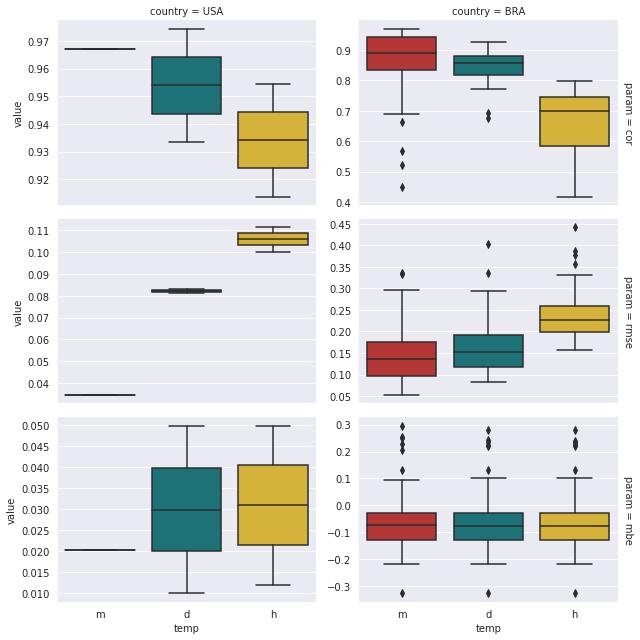

In [47]:
res = results[(results.dataset=='ERA5')&(results.GWA=='GWA2')&(results.param!='avg')&((results.region=='BPA')|(results.region=='TX')|(results.country=='BRA'))]
sns.catplot(x = 'temp', y = 'value', col='country',row='param',
              kind='box',order=['m','d','h'],
            height=3, aspect=1.5,
            data=res, margin_titles=True, sharey=False)#.set_axis_labels("systemsize", "value")#.set_xticklabels(rotation=20)

#### use all USA

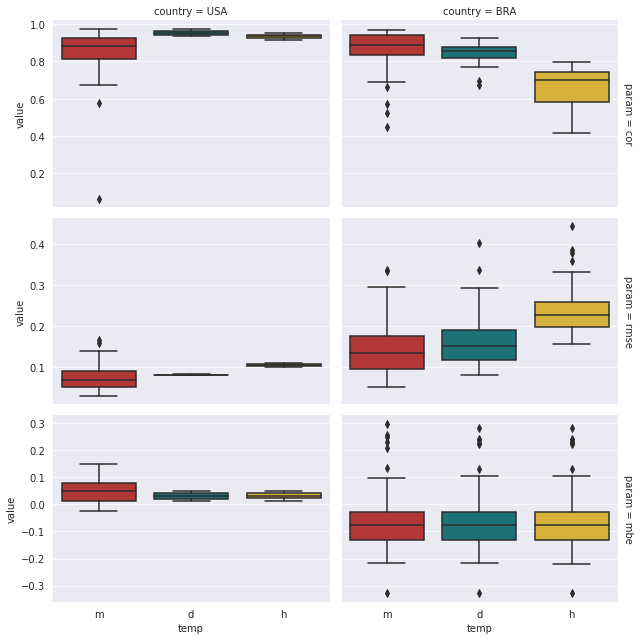

In [44]:
res = results[(results.dataset=='ERA5')&(results.GWA=='GWA2')&(results.param!='avg')]
sns.catplot(x = 'temp', y = 'value', col='country',row='param',
              kind='box',order=['m','d','h'],
            height=3, aspect=1.5,
            data=res, margin_titles=True, sharey='row')#.set_axis_labels("systemsize", "value")#.set_xticklabels(rotation=20)